In [30]:
%matplotlib inline
import numpy as np
import itertools
import logging

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from config import CFG
from kde_classes import Model, KDE

# Logging setup utilities
from debugging import (
    setup_logger,
    setup_console_handler
)

In [ ]:
setup_logger('KDE', logging.DEBUG)
log_format = '%(asctime)s %(processName)s %(name)s %(levelname)s: '\
             '%(message)s'
setup_console_handler('KDE', logging.DEBUG, log_format)

In [60]:
#mc = np.load(CFG['paths']['mg_mc'])
model = Model('models.sig_psi_E', mc=None, weighting='plotter_wkde')

In [61]:
kde = KDE(model)

In [62]:
out_bins = []
for i, key in enumerate(model.vars):
    out_bins.append(np.linspace(model.ranges[i][0],
                                model.ranges[i][1],
                                model.nbins[i]))
    print(key)
coords = np.array(list(itertools.product(*out_bins)))
X, Y = np.meshgrid(*out_bins[:-1], indexing='ij')

lgb_sigma_psimu
psi_mu
log_e


In [53]:
binned_kernel_density = kde.generate_binned_kd([0.06, 0.16])

In [54]:
pdf_vals = np.asarray([kde.eval_point(binned_kernel_density, coord) for coord in coords])
pdf_vals = pdf_vals.reshape(model.nbins)

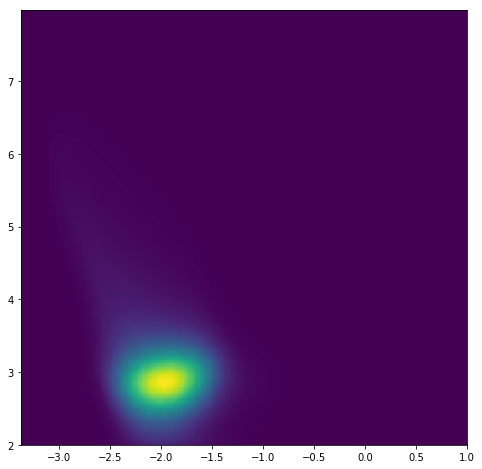

In [55]:
plt.figure(figsize=(8, 8))

plt.pcolormesh(X, Y, pdf_vals)

Text(0.5,0,'y, $\\sigma=2$')

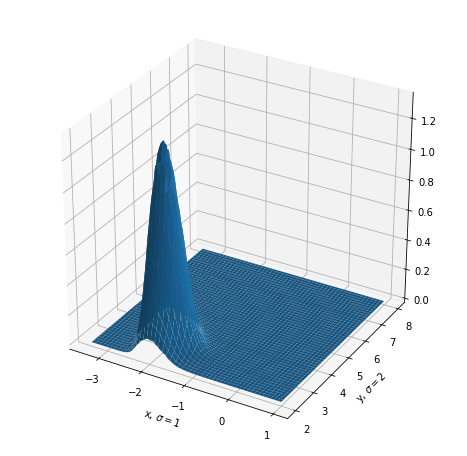

In [49]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Generate adaptive kde

In [ ]:
adaptive_kernel_density = kde.generate_adaptive_kd([0.5, 0.6])

In [ ]:
adaptive_pdf_vals = np.asarray([kde.eval_point(adaptive_kernel_density, coord) for coord in coords])
adaptive_pdf_vals = adaptive_pdf_vals.reshape(model.nbins)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, adaptive_pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Plot mc data

In [ ]:
from dataset import load_and_prepare_data

mc = load_and_prepare_data(CFG['paths']['IC_mc'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
#h = ax.hist2d(mc['x'], mc['y'], bins=[100, 100], range=[[-5, 5], [-5, 5]])
h = ax.hist2d(np.log10(mc['sigma_pull_corrected']), mc['logE'], bins=[200, 100])
fig.colorbar(h[3], ax=ax)

In [ ]:
cv_result = kde.cross_validate([0.5, 0.5], adaptive=False)

In [ ]:
cv_result

In [ ]:
result = kde.cross_validate_bandwidths(bandwidths=[[0.5, 0.6], [0.6]], adaptive=True)

In [ ]:
result

In [ ]:
result[result['LLH'] == np.max(result['LLH'])]

In [ ]:
import glob
import numpy as np

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

mc = np.load(CFG['paths']['mg_mc'])

model = Model('models.multi_gaussian', mc, weighting=None)
kde = KDE(model)

cv_files = glob.glob('output/multi_gaussian/cv_*.npy')
cv_results = np.array([], dtype=kde.cv_result.dtype)

print(kde.cv_result.dtype)
for cv_file in cv_files:
    cv_result = np.loadtxt(cv_file, dtype=kde.cv_result.dtype)
    cv_results = np.append(cv_results, re)

print(cv_results)

In [ ]:
import glob
import numpy as np

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

mc = np.load(CFG['paths']['mg_mc'])

model = Model('models.multi_gaussian', mc, weighting=None)
kde = KDE(model)

cv_files = glob.glob('output/multi_gaussian/cv/cv_*.npy')
cv_results = np.array([], dtype=kde.cv_result.dtype)

for cv_file in cv_files:
    cv_result = np.load(cv_file)
    cv_results = np.append(cv_results, cv_result)

print(cv_results)

result_max_LLH = cv_results[cv_results['LLH'] == np.max(cv_results['LLH'])]

bandwidth = [result_max_LLH[key] for key in model.bandwidth_vars]

print(bandwidth)

In [ ]:
bandwidth[1]

In [56]:
import cPickle as pickle

with open('/home/ge56lag/Software/KDE/output/sig_psi_E/pdf/sig_psi_E.pkl', 'rb') as f:
            sig_psi_E = pickle.load(f)

In [57]:
sig_psi_E['bw']

[array([0.08], dtype=float32),
 array([0.18], dtype=float32),
 array([0.14], dtype=float32)]

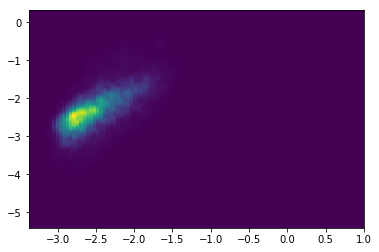

In [70]:
plt.figure()

plt.pcolormesh(X, Y, sig_psi_E['pdf_vals'][:, :, 50])

Text(0.5,0,'y')

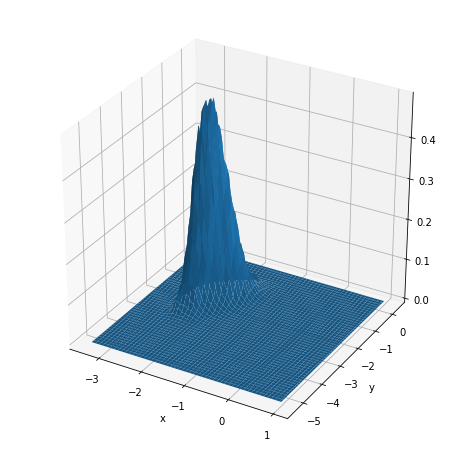

In [66]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, sig_psi_E['pdf_vals'][:, :, 10])
ax.set_xlabel('x')
ax.set_ylabel('y')

In [12]:
bg['pdf_vals'][:, :, 0].shape

(100, 100)

In [ ]:
eval(str("[2, 3]"))

In [ ]:
model.mc['sigma_pull_corrected']

In [ ]:
model.mc.dtype.names

In [ ]:
from dataset import load_and_prepare_data

mc = np.load('/home/ge56lag/Data/diffuse_mc_wBDT.npy')

In [ ]:
mc['sigma_pull_corrected_mu']

In [ ]:
mc.dtype.names

In [28]:
mc = np.load('/home/ge56lag/Data/dataset_8yr_fit_IC86_2012_16_MC_2017_09_29_more_fields.npy')

In [29]:
mc.dtype.names

('Run',
 'Event',
 'SubEvent',
 'MJD_day',
 'MJD_sec',
 'MJD_ns',
 'azimuth_MPEFit',
 'zenith_MPEFit',
 'zenith_MPEFit_exists',
 'zenith_MPEFit_fit_status',
 'energy_truncated',
 'energy_truncated_exists',
 'azimuth_ReReco',
 'zenith_ReReco',
 'zenith_ReReco_exists',
 'zenith_ReReco_fit_status',
 'sigma1',
 'sigma2',
 'sigmaOK',
 'trueAzi',
 'trueZen',
 'trueE',
 'trueType',
 'energy_truncated_fit_status',
 'nChannel',
 'orig_OW',
 'powerlaw',
 'azi',
 'zen',
 'mjd',
 'ra',
 'dec',
 'logE',
 'sigma',
 'trueRa',
 'trueDec',
 'conv',
 'prompt',
 'astro',
 'best_fit_OW',
 'sigma_pull_corrected',
 'psi',
 'logEt')

In [ ]:
cv = np.load('output/bg/cv/cv_0.npy')

In [ ]:
cv